## Description 
**This code is selecting some features from house prices dataset to debug my tree implemantation on real data** \
It is not intended to be a detaild examination\preprocessing and visualization for this dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'

In [3]:
train = pd.read_csv(TRAIN_PATH)
display(train.head(2))
train_metadata_cols = train.dtypes.to_frame('dtype')
train_metadata_cols['missing_values_%'] = train.isnull().sum() / len(train)
train_metadata_cols.sort_values(by=['dtype','missing_values_%']).head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


,dtype,missing_values_%
Id,int64,0.0
MSSubClass,int64,0.0
LotArea,int64,0.0
OverallQual,int64,0.0
OverallCond,int64,0.0


In [4]:
# selecting columns
columns = ['LotArea','YearBuilt','OverallCond','HouseStyle','SalePrice']
categorical_columns = ['OverallCond','HouseStyle']
for col in categorical_columns:
    print(f"{col}_{len(train[col].unique())}_{train[col].isnull().sum()/len(train)}")

OverallCond_9_0.0
HouseStyle_8_0.0


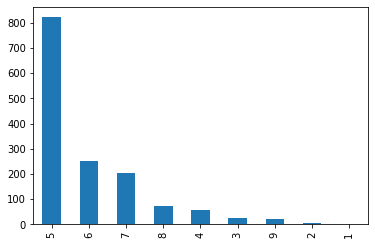

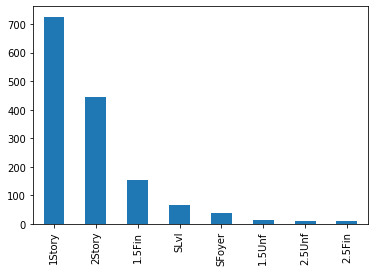

In [5]:
for col in categorical_columns:
    plt.figure()
    train[col].value_counts().plot.bar()

In [6]:
 train['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [7]:
# bining
def over_all_cond_bining(x):
    if x<= 4:
        return 'low'
    elif 4 <x <= 6:
        return 'medium'
    else:
        return 'high'
    
def house_style_bining(x):
    return x if x in ['1Story','2Story','1.5Fin'] else 'else'
    
df = train[columns]
transformations = {'OverallCond': over_all_cond_bining,'HouseStyle': house_style_bining}
for col,tran in transformations.items():
    df[col] = train[col].apply(tran)

C:\Users\afeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


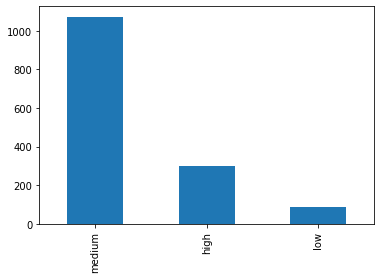

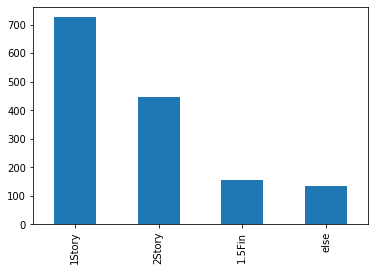

In [8]:
for col in categorical_columns:
    plt.figure()
    df[col].value_counts().plot.bar()

In [9]:
df.dtypes

LotArea         int64
YearBuilt       int64
OverallCond    object
HouseStyle     object
SalePrice       int64
dtype: object

In [11]:
df.corr()

,LotArea,YearBuilt,SalePrice
LotArea,1.000000,0.014228,0.263843
YearBuilt,0.014228,1.000000,0.522897
SalePrice,0.263843,0.522897,1.000000


In [12]:
df.to_csv('house_pricing_moc_dataset.csv', index = False)

In [16]:
# how to open it
pd.read_csv('house_pricing_moc_dataset.csv',dtype = {'OverallCond':'category','HouseStyle': 'category'}).dtypes

LotArea           int64
YearBuilt         int64
OverallCond    category
HouseStyle     category
SalePrice         int64
dtype: object